**Question 4**

Develop three classifiers for the MNIST dataset using three different models: soft-max regression, MLP, and CNN.

# Setup

In [30]:
# Common imports
import numpy as np
import os

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

import matplotlib
import matplotlib.pyplot as plt

import math

# MNIST

In [1]:
mnist = fetch_mldata('MNIST original')

# Use the notion of y=f(X)
X, y = mnist["data"], mnist["target"]
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0
The images are of size: 28.0 x 28.0


# Test and Training Data

In [7]:
np.random.seed(42)
shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]
print(y_train[0])

7.0


# Multiclass classification

### Softmax regression

In [49]:
# For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest approach
# (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.)
mult_clf = LogisticRegression(max_iter=5, multi_class='multinomial', solver='lbfgs')
mult_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred = mult_clf.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
y_pred_test = mult_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.8422166666666666 
Classifier accuracy on the training set is 0.8326 


In [53]:
y_train_pred = mult_clf.predict(X_train)
y_test_pred = mult_clf.predict(X_test)
conf_mx_train  = confusion_matrix(y_train, y_train_pred)
conf_mx_test  = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix (training): \n{0}'.format(conf_mx_train))
print('Confusion matrix (test): \n{0}'.format(conf_mx_test))

Confusion matrix (training): 
[[5360    0   39   22   13  145  151    5  128   11]
 [   0 6182   66   28    3   62   21   10  337    8]
 [ 113   89 4834  161  134   14  240  109  299   33]
 [  48   33  200 4906    7  266   64   83  368  113]
 [  23   37   37    3 4913    9  133   23   85  590]
 [ 151  121   93  468  149 3798  165   53  260  145]
 [ 100   69  147    6   50  106 5347    0   75    0]
 [  93  140  115    8  105    8    7 5409   89  277]
 [  36  104   90  279   37  176   57   41 4880  199]
 [  77   56   63   96  326   42   11  278  136 4904]]
Confusion matrix (test): 
[[ 926    0   10    3    0   25   36    0   29    0]
 [   0 1067   10    5    0    9    3    2   63    1]
 [  11   10  790   20   14    0   37   20   56    6]
 [   9   12   43  837    1   48   12   20   45   26]
 [   3   13    6    0  803    2   23    2   16  103]
 [  29   20   22   89   26  601   35    8   53   27]
 [  13   16   27    1    9   21  878    0   11    0]
 [  14   24   19    3   17    0    2  908 

In [24]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

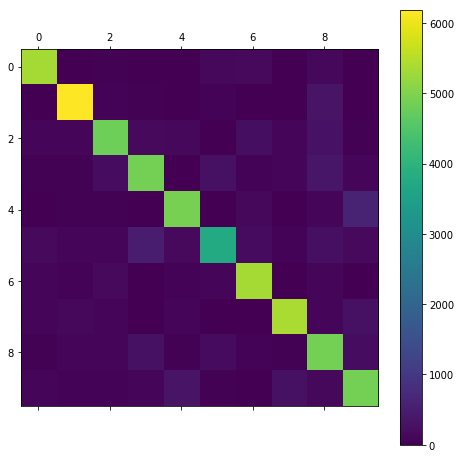

In [28]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(conf_mx)
plt.show()

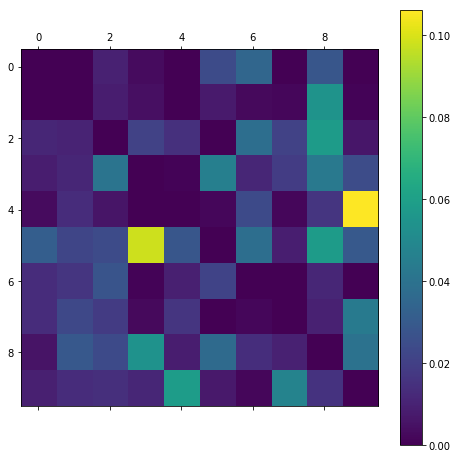

In [54]:
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_test / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

### MLP

In [38]:
nn_clf = MLPClassifier(max_iter=100,solver='sgd',validation_fraction=0.0, verbose='true')
nn_clf.fit(X_train, y_train)

Iteration 1, loss = 1.75897475
Iteration 2, loss = 0.96002620
Iteration 3, loss = 0.69720540
Iteration 4, loss = 0.45498858
Iteration 5, loss = 0.37761542
Iteration 6, loss = 0.33838623
Iteration 7, loss = 0.31558029
Iteration 8, loss = 0.29880765
Iteration 9, loss = 0.28865154
Iteration 10, loss = 0.27436245
Iteration 11, loss = 0.26918680
Iteration 12, loss = 0.26054291
Iteration 13, loss = 0.25519014
Iteration 14, loss = 0.25097437
Iteration 15, loss = 0.24502011
Iteration 16, loss = 0.23999959
Iteration 17, loss = 0.23553339
Iteration 18, loss = 0.23146976
Iteration 19, loss = 0.22723602
Iteration 20, loss = 0.22503644
Iteration 21, loss = 0.22434162
Iteration 22, loss = 0.22192464
Iteration 23, loss = 0.21687442
Iteration 24, loss = 0.21570887
Iteration 25, loss = 0.21272449
Iteration 26, loss = 0.20861221
Iteration 27, loss = 0.20876721
Iteration 28, loss = 0.20572685
Iteration 29, loss = 0.20297555
Iteration 30, loss = 0.20207312
Iteration 31, loss = 0.19992818
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.0,
       verbose='true', warm_start=False)

In [39]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)

print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.9526666666666667 
Classifier accuracy on the test set is 0.9305 


In [44]:
y_train_pred = nn_clf.predict(X_train)
y_test_pred = nn_clf.predict(X_test)
conf_mx_train  = confusion_matrix(y_train, y_train_pred)
conf_mx_test  = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix (training): \n{0}'.format(conf_mx_train))
print('Confusion matrix (test): \n{0}'.format(conf_mx_test))

Confusion matrix (training): 
[[5714    2    6    1    9   34   25    0   72   11]
 [   2 6625   40    7    7    2    3   10   13    8]
 [  40   18 5737   11   69   11   17   29   87    7]
 [  25   10  203 5449    2  144    8   41  126   80]
 [  13    7   16    0 5416    3   24    5   47  322]
 [  94    4    9   56    5 4990   90    2   90   63]
 [  54    8   14    0   31   25 5728    0   37    3]
 [   9    5   70    7   47   12    0 6009    6   86]
 [  21   11   35    5    6   45   25    8 5699   44]
 [  32    3    0   20   30   21    0   26   64 5793]]
Confusion matrix (test): 
[[ 996    0    4    1    0    4    5    2   15    2]
 [   1 1129    3    1    3    0    2    6   13    2]
 [   5    2  913    3    9    2    3    4   19    4]
 [   6    4   53  892    2   35    2   13   28   18]
 [   2    6    3    0  880    3    2    2   11   62]
 [  18    2    6   23    1  797   20    0   23   20]
 [   9    3    3    0    3    5  946    0    7    0]
 [   2    4   23    3   10    2    0  975 

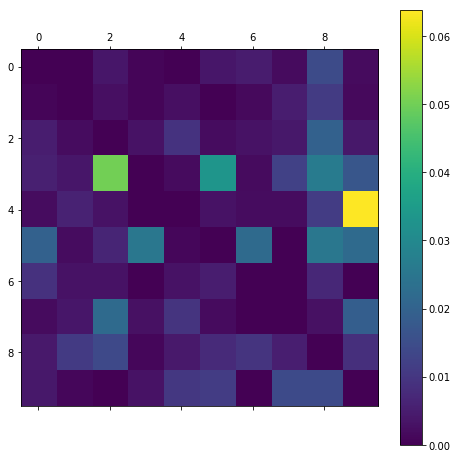

In [46]:
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_test / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

### CNN

In [ ]:
# https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [56]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

x_train = X_train
x_test = X_test
# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1184s 20ms/step - loss: 0.2623 - acc: 0.9189 - val_loss: 0.0680 - val_acc: 0.9794
Epoch 2/2
60000/60000 [==============================] - 1107s 18ms/step - loss: 0.0905 - acc: 0.9728 - val_loss: 0.0528 - val_acc: 0.9846
Test loss: 0.05277831609779969
Test accuracy: 0.9846
